In [111]:
import pandas as pd 
import geopandas as gpd

#https://www.countyhealthrankings.org/health-data/texas/data-and-resources
#https://healthdata.dshs.texas.gov/dashboard/mental-health/mental-health#data-source


In [112]:
left = pd.read_excel('2025_county_health_rankings_texas_data_-_v1.xlsx', sheet_name="Select Measure Data")

left = left[['State', 'County','Average Number of Mentally Unhealthy Days','# Mental Health Providers', 'Mental Health Provider Rate', 
      'Mental Health Provider Ratio', '# Primary Care Physicians', 'Primary Care Physicians Rate', 
       'Primary Care Physicians Ratio', '# Uninsured', '% Uninsured' ]]

right = pd.read_excel('2025_county_health_rankings_texas_data_-_v1.xlsx', sheet_name='Additional Measure Data')

right = right[['State', 'County','% Frequent Mental Distress', 'Suicide Rate (Age-Adjusted)', 'Other Primary Care Provider Ratio',
           'Population']]

finaldata = pd.merge(left=left, right=right, how='inner', on=['State', 'County'])
finaldata

,State,County,Average Number of Mentally Unhealthy Days,# Mental Health Providers,Mental Health Provider Rate,Mental Health Provider Ratio,# Primary Care Physicians,Primary Care Physicians Rate,Primary Care Physicians Ratio,# Uninsured,% Uninsured,% Frequent Mental Distress,Suicide Rate (Age-Adjusted),Other Primary Care Provider Ratio,Population
0,Texas,NaN,5.130877,51742.0,169.62754,590:1,17818.0,60.34285,1657:1,4760829,18.780374,16.2,13.798586,871:1,30503301
1,Texas,Anderson,5.747067,36.0,62.35278,1604:1,22.0,37.66994,2655:1,6314,17.659563,18.4,32.822980,1283:1,57736
2,Texas,Andrews,5.654674,3.0,16.07372,6221:1,9.0,48.80694,2049:1,3747,22.871269,18.9,15.595604,1333:1,18664
3,Texas,Angelina,6.074380,144.0,164.91256,606:1,57.0,65.89138,1518:1,13772,19.635296,21.2,16.764159,766:1,87319
4,Texas,Aransas,5.835400,24.0,94.58501,1057:1,8.0,32.63974,3064:1,3643,20.601708,20.1,36.054092,1692:1,25374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Texas,Wood,5.924809,28.0,58.42950,1711:1,15.0,32.69755,3058:1,6464,19.822748,19.0,19.120030,1331:1,47921
251,Texas,Yoakum,5.757049,3.0,40.17140,2489:1,2.0,26.29157,3804:1,1733,26.645141,20.1,NaN,1245:1,7468
252,Texas,Young,5.856503,15.0,82.76319,1208:1,15.0,83.43995,1198:1,2993,21.134021,20.3,23.525579,1295:1,18124
253,Texas,Zapata,5.916112,NaN,NaN,NaN,NaN,NaN,NaN,2778,23.676809,21.4,14.489852,2289:1,13736


Show the different physician ratios with respect to each county (combine with demographics dataset if possible)

In [113]:
# read in demographics dataset
demographics = pd.read_csv('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/demographics.csv')
dem_final = demographics.copy()
# remove the 'county' in each county name 
dem_final['COUNTYNAME'] = dem_final['COUNTYNAME'].str.replace('County', '', case=False).str.strip()

#merge mentalhealth data with demographics 
merged_dem_data = pd.merge(left=finaldata, right=dem_final, left_on='County', right_on='COUNTYNAME', how='left')
merged_dem_data.drop(columns='Unnamed: 0', inplace=True)

# replace with a binary categorical value for later graphing
def create(input):
    if pd.isna(input):
        return 'Low % Minority'
    else:
        return 'High % Minority'
merged_dem_data['High or Low % Minority'] = merged_dem_data['COUNTYNAME'].apply(create)

mh_and_demographic = merged_dem_data.copy()
mh_and_demographic

,State,County,Average Number of Mentally Unhealthy Days,# Mental Health Providers,Mental Health Provider Rate,Mental Health Provider Ratio,# Primary Care Physicians,Primary Care Physicians Rate,Primary Care Physicians Ratio,# Uninsured,% Uninsured,% Frequent Mental Distress,Suicide Rate (Age-Adjusted),Other Primary Care Provider Ratio,Population,COUNTYNAME,High or Low % Minority
0,Texas,NaN,5.130877,51742.0,169.62754,590:1,17818.0,60.34285,1657:1,4760829,18.780374,16.2,13.798586,871:1,30503301,NaN,Low % Minority
1,Texas,Anderson,5.747067,36.0,62.35278,1604:1,22.0,37.66994,2655:1,6314,17.659563,18.4,32.822980,1283:1,57736,Anderson,High % Minority
2,Texas,Andrews,5.654674,3.0,16.07372,6221:1,9.0,48.80694,2049:1,3747,22.871269,18.9,15.595604,1333:1,18664,NaN,Low % Minority
3,Texas,Angelina,6.074380,144.0,164.91256,606:1,57.0,65.89138,1518:1,13772,19.635296,21.2,16.764159,766:1,87319,Angelina,High % Minority
4,Texas,Aransas,5.835400,24.0,94.58501,1057:1,8.0,32.63974,3064:1,3643,20.601708,20.1,36.054092,1692:1,25374,NaN,Low % Minority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Texas,Wood,5.924809,28.0,58.42950,1711:1,15.0,32.69755,3058:1,6464,19.822748,19.0,19.120030,1331:1,47921,NaN,Low % Minority
251,Texas,Yoakum,5.757049,3.0,40.17140,2489:1,2.0,26.29157,3804:1,1733,26.645141,20.1,NaN,1245:1,7468,Yoakum,High % Minority
252,Texas,Young,5.856503,15.0,82.76319,1208:1,15.0,83.43995,1198:1,2993,21.134021,20.3,23.525579,1295:1,18124,NaN,Low % Minority
253,Texas,Zapata,5.916112,NaN,NaN,NaN,NaN,NaN,NaN,2778,23.676809,21.4,14.489852,2289:1,13736,NaN,Low % Minority


Show the mental health provider ratio for each county (combine with demographics dataset if possible)

Show the suicide rate for each county (combine with demographics dataset)

The following dataset consists of locational data regarding where mental health clinicians work and at what capacity. 

In [114]:
therapists_data = pd.read_csv('Clinician_Region.csv')
therapists_data

,County,Public Health Region,La Paz Border Designation,Urban Rural Designation,2015 Population,2016 Population,2017 Population,2018 Population,2019 Population,2020 Population,...,Psychiatrist 2015,Psychiatrist 2016,Psychiatrist 2017,Psychiatrist 2018,Psychiatrist 2019,Psychiatrist 2020,Psychiatrist 2021,Psychiatrist 2022,Psychiatrist 2023,Psychiatrist 2024
0,Anderson,PHR 4/5N,Non-Border,Rural,58408,58382,58342,58293,58248,58199,...,3,3,5,4,4,4,4,4,3,3
1,Andrews,PHR 9/10,Non-Border,Rural,17952,18708,19526,20388,21305,22269,...,0,0,0,0,0,0,0,0,0,0
2,Angelina,PHR 4/5N,Non-Border,Rural,88868,89219,89557,89860,90151,90437,...,3,5,6,10,11,12,14,18,15,14
3,Aransas,PHR 11,Non-Border,Urban,25302,25763,26228,26700,27198,27699,...,1,1,1,1,1,1,1,1,2,1
4,Archer,PHR 2/3,Non-Border,Urban,8657,8582,8516,8452,8393,8344,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,PHR 4/5N,Non-Border,Rural,43677,44009,44331,44666,44993,45292,...,0,0,0,0,0,0,0,0,0,0
250,Yoakum,PHR 1,Non-Border,Rural,8449,8599,8752,8899,9060,9225,...,0,0,0,0,0,0,0,0,0,0
251,Young,PHR 2/3,Non-Border,Rural,18571,18603,18640,18667,18695,18712,...,0,0,0,0,0,0,0,0,0,0
252,Zapata,PHR 11,Border,Rural,14282,14327,14353,14377,14403,14409,...,0,0,0,0,0,0,0,0,0,0


The ultimate goal would be to show a map. It shows with or without high % minorities. 
Then, it would also graph high v low amounts of therapists/psychiatrists per county 

In [ ]:
#clean and merge the two datasets
therapists_data['County'] = therapists_data['County'].str.replace('County', '', case=False).str.strip()
therapist_merged = pd.merge(left=therapists_data, right=dem_final, left_on='County', right_on='COUNTYNAME',
         how='left')
therapist_merged.drop(columns='Unnamed: 0', inplace=True)

#Create new column that makes a binary categorical variable
therapist_merged['High or Low % Minority'] = therapist_merged['COUNTYNAME'].apply(create)
therapist_merged



,County,Public Health Region,La Paz Border Designation,Urban Rural Designation,2015 Population,2016 Population,2017 Population,2018 Population,2019 Population,2020 Population,...,Psychiatrist 2017,Psychiatrist 2018,Psychiatrist 2019,Psychiatrist 2020,Psychiatrist 2021,Psychiatrist 2022,Psychiatrist 2023,Psychiatrist 2024,COUNTYNAME,High or Low % Minority
0,Anderson,PHR 4/5N,Non-Border,Rural,58408,58382,58342,58293,58248,58199,...,5,4,4,4,4,4,3,3,Anderson,High % Minority
1,Andrews,PHR 9/10,Non-Border,Rural,17952,18708,19526,20388,21305,22269,...,0,0,0,0,0,0,0,0,NaN,Low % Minority
2,Angelina,PHR 4/5N,Non-Border,Rural,88868,89219,89557,89860,90151,90437,...,6,10,11,12,14,18,15,14,Angelina,High % Minority
3,Aransas,PHR 11,Non-Border,Urban,25302,25763,26228,26700,27198,27699,...,1,1,1,1,1,1,2,1,NaN,Low % Minority
4,Archer,PHR 2/3,Non-Border,Urban,8657,8582,8516,8452,8393,8344,...,0,0,0,0,0,0,0,0,NaN,Low % Minority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,PHR 4/5N,Non-Border,Rural,43677,44009,44331,44666,44993,45292,...,0,0,0,0,0,0,0,0,NaN,Low % Minority
250,Yoakum,PHR 1,Non-Border,Rural,8449,8599,8752,8899,9060,9225,...,0,0,0,0,0,0,0,0,Yoakum,High % Minority
251,Young,PHR 2/3,Non-Border,Rural,18571,18603,18640,18667,18695,18712,...,0,0,0,0,0,0,0,0,NaN,Low % Minority
252,Zapata,PHR 11,Border,Rural,14282,14327,14353,14377,14403,14409,...,0,0,0,0,0,0,0,0,NaN,Low % Minority


<Axes: >

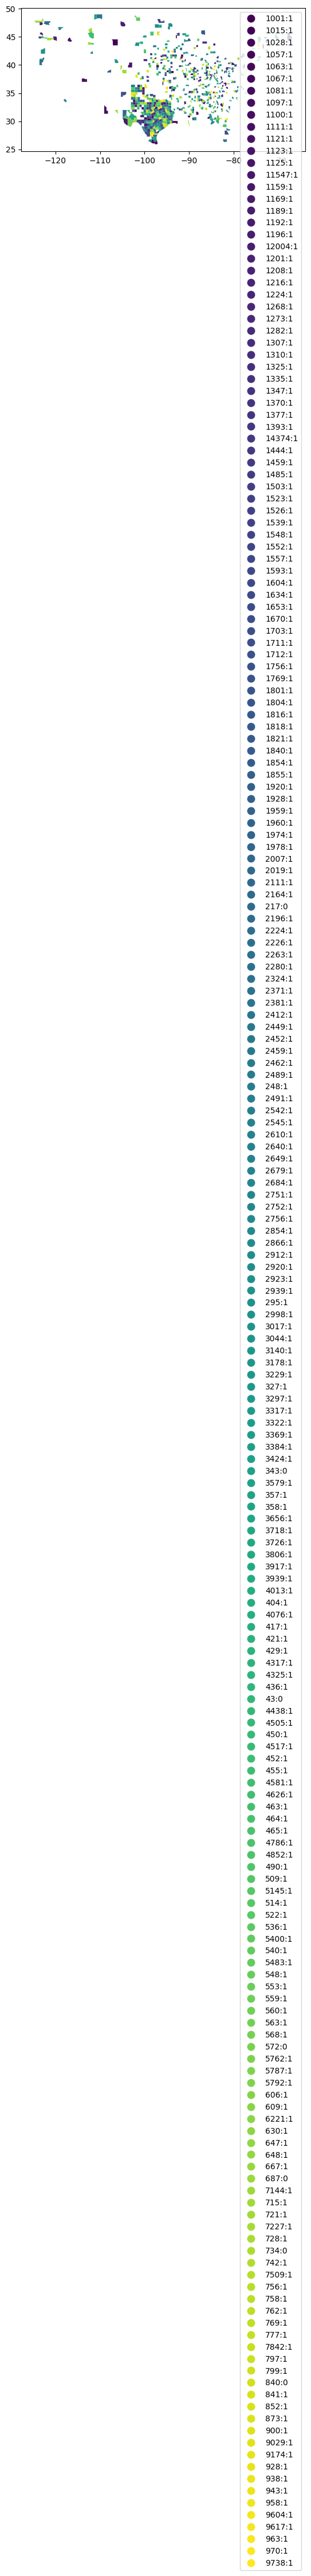

In [123]:
# Get Texas county shapes
texas_counties = gpd.read_file('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/texas_shapefile.zip') # Replace with actual Texas shapefile

# Merge shapefile with mh_and_demographic or therapist_merged
map_data = texas_counties.merge(mh_and_demographic, left_on='NAME', right_on='County')

# Plot
map_data.plot(column='Mental Health Provider Ratio', cmap='viridis', legend=True)
